In [1]:
# for autoreloading edited the modules and packages instead of restarting the kernel
%reload_ext autoreload
%autoreload 2

## K-Nearest Neighbors (KNN) model

In [2]:
# from collections import Counter
# import numpy as np
# from pandas import DataFrame
# from sklearn import metrics, preprocessing
# from sklearn.neighbors import KNeighborsClassifier


### 1. data preparation

#### 1.1. prepare dataset

In [3]:
from pathlib import Path
import pandas as pd


In [4]:
data_dir = Path("data_preprocess")
data_path = data_dir / "cleaned_ico_dataset.csv"

df = pd.read_csv(data_path)
df.describe()


,switzerland,Registered in offshore financial center,total_number_of_tokens,Independent custodian for ICO funds,cap_includes_presale,Team experience missing,Crowdsale is auction,air_drop_after_ICO,Unsold tokens kept by issuer,Has VC backing,...,Use of proceeds mentioned,Is a utility token,is_ethereum,Product can be tried out,additional_token_emissions,Legal entity is corporation,ico_successful,presale_transparent,Legal entity is foundation,Funding milestones
count,218.000000,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.00000,218.00000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.123853,0.201835,4.700876e+10,0.032110,0.733945,0.142202,0.068807,0.12844,0.43578,0.288991,...,0.738532,0.669725,0.963303,0.431193,0.068807,0.701835,0.990826,0.770642,0.050459,0.027523
std,0.330172,0.402293,6.772432e+11,0.176698,0.442910,0.350061,0.253709,0.33535,0.49700,0.454337,...,0.440446,0.471395,0.188450,0.496383,0.253709,0.458505,0.095562,0.421387,0.219393,0.163978
min,0.000000,0.000000,1.250000e+03,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.455124e+07,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.301355e+08,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,9.720000e+08,0.000000,1.000000,0.000000,0.000000,0.00000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000e+13,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***

#### step 2. handle missing values

In [5]:
nan_values = sum(df.isna().sum())
nan_values


0

There are no missing data.  
It was handled before; So there is no need to handle missing data.

***

### Part 2. Feature Selection

#### step 3. select features

In [6]:
from data_preprocess.data_utils import get_processed_data


In [7]:
x, y = get_processed_data(data_path, one_hot_encode=False)
x.shape, y.shape


((218, 89), (218, 1))

---

#### step 4. visualize heatmap

In [8]:
import seaborn as sns


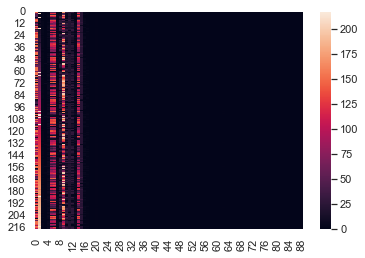

In [9]:
sns.set_theme()
ax = sns.heatmap(x)


comparing values in the above figure is hard because of large differences between feature values.  
the solution is to normalize feature values.

---

#### step 5. standardize input features

In [10]:
from sklearn.preprocessing import StandardScaler


Text(30.5, 0.5, 'examples')

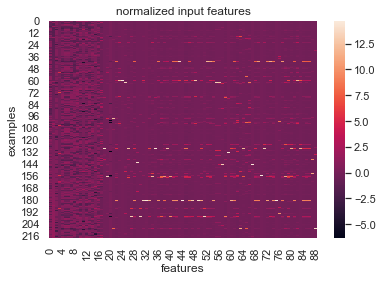

In [11]:
# using z-score method
scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)
sns.set_theme()
ax = sns.heatmap(x_standard)
ax.set_title("normalized input features")
ax.set_xlabel("features")
ax.set_ylabel("examples")


---

#### step 6. split dataset into train and test datasets


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=test_size,
    random_state=28,
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((196, 89), (22, 89), (196, 1), (22, 1))

***

### Part 3. Model Implementation

TODO
tune hyperparameters

#### step 7. implement KNN with sklearn

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from knn.train_utils import find_best_hyperparameter, train_knn_with_kfold


In [15]:
parameters = {
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [20, 30, 40],
    "metric": ["minkowski"],
    "n_jobs": [-1],
    "n_neighbors": [1, 3, 5, 7, 9, 15, 30, 45, 60, 75, 90, 120, 150, 170],
    "p": [1, 2, 3],
    "weights": ["uniform", "distance"],
}

regressor = KNeighborsRegressor()


In [16]:
best_hyperparameter = find_best_hyperparameter(data_path, regressor, parameters)
best_hyperparameter


Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


{'algorithm': 'kd_tree',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

In [17]:
regressor = KNeighborsRegressor(**best_hyperparameter)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

training_score = regressor.score(x_train, y_train)
test_score = regressor.score(x_test, y_test)

scores = [training_score, test_score]
scores


[0.10220189010514835, -0.0996590053447246]

#### step 8. fine-tune k

In [18]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Minimum error:  211.92502207445148 at k = 77


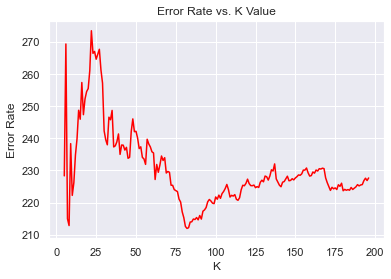

In [19]:
error_rate = []
k_range = 197
range_start = 5
for i in range(range_start, k_range):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    error_rate.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(range(range_start, k_range), error_rate, color="red")
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
print("Minimum error: ", min(error_rate), "at k =", error_rate.index(min(error_rate)))


***

### Part 4. Validation

#### step 9. prediction error


In [20]:
from knn.train_utils import train_knn_with_kfold
from data_preprocess.data_utils import get_processed_data


In [21]:
mean_error = train_knn_with_kfold(data_path=data_path, **best_hyperparameter)
print(f"mean_error = {mean_error} M$")


mean_error = 22.82961447866601 M$


### Part 5. applying the model

In [22]:
# TODO